In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

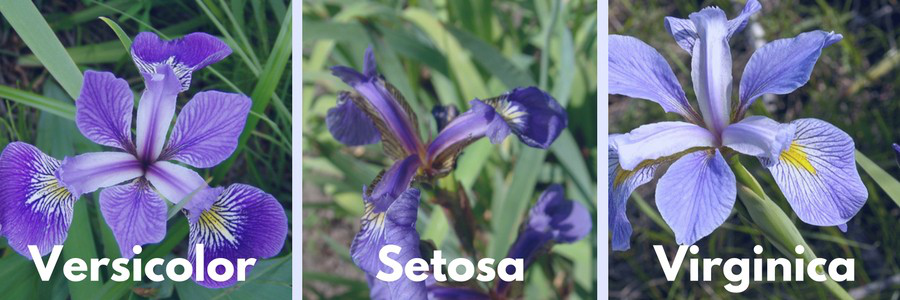

In [2]:
img=Image.open("0_Uw37vrrKzeEWahdB.jfif")
img

In [3]:
df=pd.read_csv('iris.csv',index_col=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

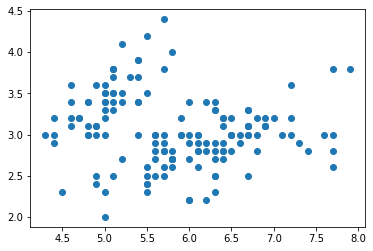

In [6]:
plt.scatter(df['sepal_length'],df['sepal_width'])

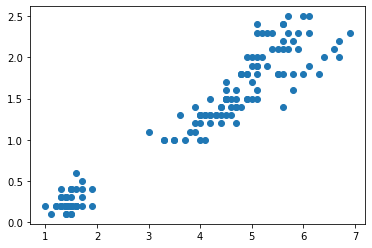

In [7]:
plt.scatter(df['petal_length'],df['petal_width'])

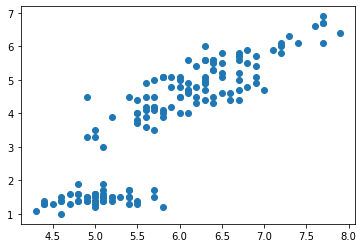

In [8]:
plt.scatter(df['sepal_length'],df['petal_length'])

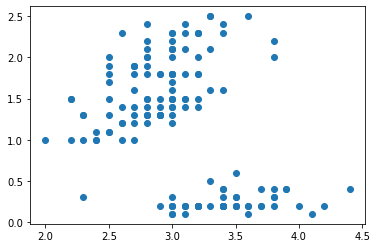

In [9]:
plt.scatter(df['sepal_width'],df['petal_width'])

In [10]:
import seaborn as sns

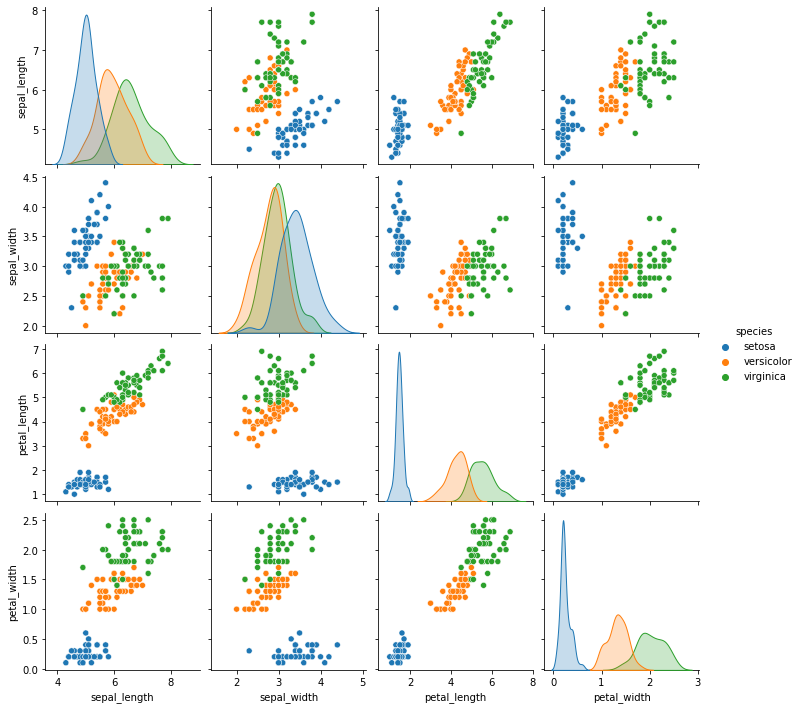

In [11]:
sns.pairplot(df,hue='species')

In [12]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
df2=df.loc[:99]

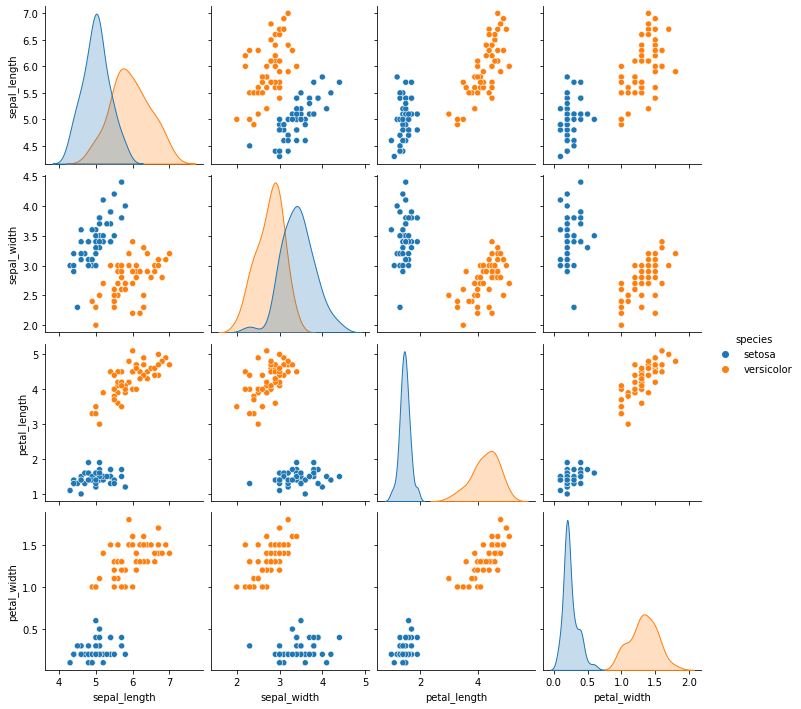

In [15]:
sns.pairplot(df2,hue='species')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain , xtest,ytrain,ytest=train_test_split(df2.drop('species',axis=1),df2['species'],test_size=0.25,random_state=10)

In [18]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 55 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  75 non-null     float64
 1   sepal_width   75 non-null     float64
 2   petal_length  75 non-null     float64
 3   petal_width   75 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


In [19]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 19 to 76
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  25 non-null     float64
 1   sepal_width   25 non-null     float64
 2   petal_length  25 non-null     float64
 3   petal_width   25 non-null     float64
dtypes: float64(4)
memory usage: 1000.0 bytes


In [20]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [21]:
model=LogisticRegression().fit(xtrain,ytrain)

In [22]:
round(model.score(xtest,ytest)*100,2)

100.0

In [23]:
df3=df[(df['species']=="versicolor")|(df['species']=='virginica')]
xtrain3 , xtest3,ytrain3,ytest3=train_test_split(df3.drop('species',axis=1),df3['species'],test_size=0.25,random_state=101)
model3=LogisticRegression().fit(xtrain3,ytrain3)
round(model3.score(xtest3,ytest3)*100,2)

100.0

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
ypred3=model3.predict(xtest3)

In [26]:
print(confusion_matrix(ytest3,ypred3))

[[15  0]
 [ 0 10]]


In [27]:
print(classification_report(ytest3,ypred3))

              precision    recall  f1-score   support

  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

